In [1]:
import qubic.toolchain as tc
import qubic.rpc_client as rc
import qubitconfig.qchip as qc
from distproc.hwconfig import FPGAConfig, load_channel_configs
import chipcalibration.config as cfg
import numpy as np
import matplotlib.pyplot as plt
import qubic.state_disc as sd
from chipcalibration import vna as vn
import qubic.job_manager as jm
import time

In [2]:
qubit='Q1'
pulse='2'
state='state1'

In [3]:
from importlib import reload

chip='X4Y2'
board='pinto'

reload(qc)

qchippath='../chipcalibration/submodules/qchip/%s/sian/'%(chip)

fpga_config = FPGAConfig(**{'fpga_clk_period': 2.e-9, 'alu_instr_clks': 5, 
                            'jump_cond_clks': 5, 'jump_fproc_clks': 5, 
                            'pulse_regwrite_clks': 3, 'pulse_load_clks': 4})
channel_configs = load_channel_configs(qchippath+'channel_config.json')
if pulse == '1':
    qchip = qc.QChip(qchippath+'qubitcfg1.json')
else:
    qchip = qc.QChip(qchippath+'qubitcfgNew.json')
qchip.cfg_dict

{'Qubits': {'Q7': {'freq': 5621010772.789028,
   'readfreq': 6837383288.575911,
   'freq_predicted': 5707780000.0,
   'readfreq3': 6837890849.262068,
   'readfreq2': 6835180849.262068,
   'readfreq00': 6837090849.262068,
   'readfreq0': 6836520849.262068,
   'freq_ef': 5356000000.0},
  'Q6': {'freq': 5880552778.000434,
   'readfreq': 6784553892.574343,
   'freq_predicted': 5915564000.0,
   'readfreq1': 6782873568.914835,
   'freq_ef': 5615900000.0},
  'Q5': {'freq': 5575283974.1750345,
   'readfreq': 6709187925.019399,
   'freq_predicted': 5696637000.0,
   'readfreq0': 6708160370.806432,
   'freq_ef': 5263900000.0},
  'Q4': {'freq': 5340119384.725408,
   'readfreq': 6710831045.286931,
   'freq_predicted': 5507286000.0,
   'readfreq0': 6709197299.30396,
   'freq_ef': 5089500000.0},
  'Q3': {'freq': 5114859573.056207,
   'readfreq': 6699839487.311397,
   'freq0': 5116843698.767973,
   'freq_predicted': 5289320500.0,
   'readfreq0': 6698689276.946692,
   'readfreq1': 6698690000.0,
   'rea

In [5]:
if state=='state0':
    circuit = [
                {'name': 'read', 'qubit': qubit, 'modi':{(0, 'amp'): 0.50}}
              ]
else:
    circuit = [
                {'name': 'X90', 'qubit': qubit},
                {'name': 'X90', 'qubit': qubit},
                {'name': 'read', 'qubit': qubit, 'modi':{(0, 'amp'): 0.50}}
              ]
# 'modi':{(0, 'amp'): 0.99}

In [6]:
compiled_prog = tc.run_compile_stage(circuit, fpga_config, qchip)
# compiled_prog.program

In [7]:
raw_asm = tc.run_assemble_stage(compiled_prog, channel_configs)

(1000,)


In [8]:
runner = rc.CircuitRunnerClient(ip='192.168.1.25', port=9097)

In [ ]:
m=6000
data_list=[]
for i in range(m):
    print(i)
    acq_data = runner.load_and_run_acq(raw_asm, n_total_shots=1, acq_chans={'0':0,'1':1}, trig_delay=0e-9)
    data_list.append(acq_data['0'])
    time.sleep(1)
    


In [9]:
acq_data = runner.load_and_run_acq(raw_asm, n_total_shots=1000, acq_chans={'0':0,'1':1}, trig_delay=0e-9)

In [ ]:
array = np.array(data_list)
array=array.reshape((m,8192))
print(array.shape)

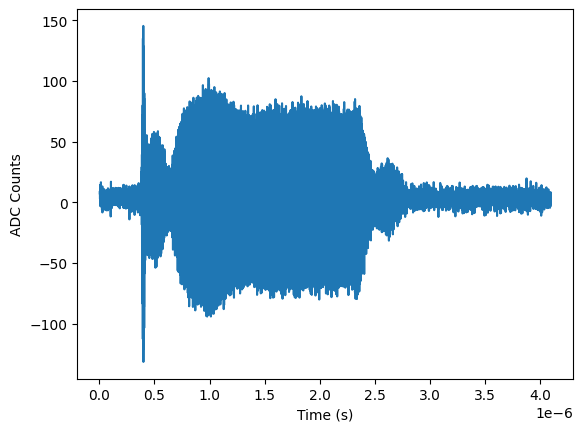

In [10]:
%matplotlib inline
plt.xlabel('Time (s)')
plt.ylabel('ADC Counts')
plt.plot(np.arange(0,acq_data['0'].shape[1]*0.5e-9,0.5e-9)[10:], np.average(acq_data['0'],axis=0)[10:])
# plt.xlim([0.3e-6, 0.4e-6])

In [ ]:
print(type(acq_data['0']))
print(acq_data['0'].shape)


#New
np.save('../data/'+qubit+'_'+pulse+'us/'+state+'.npy', acq_data['0'])


#Append
# arr1=np.load('../data/'+qubit+'_'+pulse+'us/'+state+'.npy')
# np.save('../data/'+qubit+'_'+pulse+'us/'+state+'.npy',np.vstack((arr1,acq_data['0'])))

In [11]:
np.save('../data/Q1_2us/high0.npy',acq_data['0'])